# Librairies et fichiers

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import scipy
from scipy import ndimage
from scipy import signal
from pylab import *
import time
import math
import random 

import pywt
import pywt.data

from sklearn import linear_model
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# Pour importer le datasets mnist de Keras
from tensorflow.keras.datasets.mnist import load_data


import cv2

from mpl_toolkits.mplot3d import Axes3D

import os

from copy import deepcopy

In [2]:
# on importe directement les fichiers crées par le notebook CWT_complet pour pouvoir passer rapidement à la modélisation

#nomFicTrain ='cwt_8x94x641_mexh_train.csv'
#nomFicTest ='cwt_8x94x128_mexh_test.csv'

nomFicTrain ='cwt_8x94x20_mexh_train.csv'
nomFicTest ='cwt_8x94x5_mexh_test.csv'

arr_train = pd.read_csv(nomFicTrain)
arr_test = pd.read_csv(nomFicTest)

# Pre-Processing

In [3]:
X_train = arr_train.iloc[:,1:-1]
y_train = arr_train.iloc[:,-1]
# Shape of X_train and y_train

print('Shape of X:', X_train.shape)
print('Shape of y:', y_train.shape)

Shape of X: (100, 752)
Shape of y: (100,)


In [4]:
X_test = arr_test.iloc[:,1:-1]
y_test = arr_test.iloc[:,-1]

# Shape of X_train and y_train
print('Shape of X:', X_test.shape)
print('Shape of y:', y_test.shape)

Shape of X: (25, 752)
Shape of y: (25,)


In [5]:
X_train = X_train / 255
X_test = X_test / 255

In [6]:
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.layers import Input, Dense # Pour construire un réseau de neurones et 
                                                 # instancier une couche d'entrée et une couche dense
from tensorflow.keras.models import Model

import itertools # Pour créer des iterateurs

from sklearn import metrics # Pour évaluer les modèles

In [7]:
y_train = to_categorical(y_train, dtype = 'int') 
y_test = to_categorical(y_test, dtype = 'int')   

num_pixels = X_train.shape[1]
num_classes = y_test.shape[1]

# Modélisation

In [8]:
inputs = Input(shape = num_pixels, name = "Input")

dense1 = Dense(units = 20, activation = "tanh",kernel_initializer ='normal', name = "Dense_1")
dense2 = Dense(units = num_classes, activation = "softmax",kernel_initializer ='normal', name = "Dense_2")

x=dense1(inputs)

outputs=dense2(x)

model = Model(inputs = inputs, outputs = outputs)

In [9]:
# compilation du modele
model.compile(loss = 'categorical_crossentropy',  # fonction de perte
              optimizer = 'adam',                 # algorithme d'optimisation
              metrics = ['accuracy'])             # métrique d'évaluation

In [10]:
# entrainement du modèle
training_history = model.fit(X_train, y_train,          # données d'entraînement
                             epochs = 20,               # nombre d'epochs
                             batch_size = 200,          # taille des batchs
                             validation_split = 0.2)    # proportion de l'échantillon de test

Epoch 1/20
1/1 [==============================] - 0s 349ms/step - loss: 1.6094 - accuracy: 0.2875 - val_loss: 1.6121 - val_accuracy: 0.0000e+00
Epoch 2/20
1/1 [==============================] - 0s 19ms/step - loss: 1.6087 - accuracy: 0.3000 - val_loss: 1.6146 - val_accuracy: 0.0000e+00
Epoch 3/20
1/1 [==============================] - 0s 19ms/step - loss: 1.6080 - accuracy: 0.2500 - val_loss: 1.6172 - val_accuracy: 0.0000e+00
Epoch 4/20
1/1 [==============================] - 0s 19ms/step - loss: 1.6073 - accuracy: 0.2500 - val_loss: 1.6198 - val_accuracy: 0.0000e+00
Epoch 5/20
1/1 [==============================] - 0s 21ms/step - loss: 1.6066 - accuracy: 0.2500 - val_loss: 1.6225 - val_accuracy: 0.0000e+00
Epoch 6/20
1/1 [==============================] - 0s 19ms/step - loss: 1.6059 - accuracy: 0.2500 - val_loss: 1.6252 - val_accuracy: 0.0000e+00
Epoch 7/20
1/1 [==============================] - 0s 18ms/step - loss: 1.6052 - accuracy: 0.2500 - val_loss: 1.6280 - val_accuracy: 0.0000e+0

In [11]:
# stockage des précisions d'entraînement et de test obtenues pendant l'entraînement
train_acc = training_history.history['accuracy']
val_acc = training_history.history['val_accuracy']

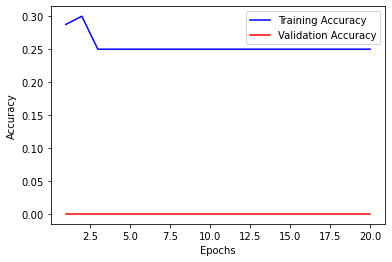

In [12]:
# Labels des axes
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Courbe de la précision sur l'échantillon d'entrainement
plt.plot(np.arange(1 , 21, 1),
         training_history.history['accuracy'],
         label = 'Training Accuracy',
         color = 'blue')

# Courbe de la précision sur l'échantillon de test
plt.plot(np.arange(1 , 21, 1),
         training_history.history['val_accuracy'], 
         label = 'Validation Accuracy',
         color = 'red')

# Affichage de la légende
plt.legend()

# Affichage de la figure
plt.show()

In [13]:
# Prediction de l'échantillon de test
test_pred = model.predict(X_test)

# Evaluation du modèle
score = model.evaluate(X_test, y_test)
score

1/1 [==============================] - 0s 13ms/step - loss: 1.6096 - accuracy: 0.2000


[1.6095930337905884, 0.20000000298023224]

In [14]:
# prédiction des classes de l'échantillon X_test
test_pred = model.predict(X_test)

# vecteurs d'entiers correspondant aux classes prédites et réelles
test_pred_class = test_pred.argmax(axis = 1)
y_test_class = y_test.argmax(axis = 1)

# compte-rendu évaluatif détaillé de la perfomance du modèle
print(metrics.classification_report(y_test_class, test_pred_class))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.20      1.00      0.33         5
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         5

    accuracy                           0.20        25
   macro avg       0.04      0.20      0.07        25
weighted avg       0.04      0.20      0.07        25



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


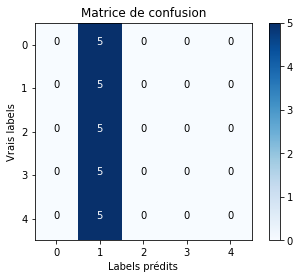

In [17]:
# Matrice de confusion

classes = range(0,5)

plt.figure()

plt.imshow(cnf_matrix, interpolation='nearest',cmap='Blues')
plt.title("Matrice de confusion")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment="center",
             color="white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black")

plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()